In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('domains.csv')

In [3]:
df.head()

,host,domain,class,subclass
0,000directory.com.ar,000directory,legit,legit
1,000webhost.com,000webhost,legit,legit
2,001fans.com,001fans,legit,legit
3,01-telecharger.com,01-telecharger,legit,legit
4,010shangpu.com,010shangpu,legit,legit


In [4]:
df.shape

(133926, 4)

# Create some features

In [5]:
#basic string features:

def string_length(s):
    length = len(s)
    return length

def string_number_count(s):
    numbers = sum(c.isdigit() for c in s)
    return numbers

def string_alpha_count(s):
    alpha = sum(c.isalpha() for c in s)
    return alpha

def string_space_count(s):
    spaces  = sum(c.isspace() for c in s)
    return spaces

def others(s):
    numbers = sum(c.isdigit() for c in s)
    alpha = sum(c.isalpha() for c in s)
    spaces  = sum(c.isspace() for c in s)
    others = len(s) - numbers - alpha - spaces
    return others

def entropy(string):
        #"Calculates the Shannon entropy of a string"

        # get probability of chars in string
        prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

        # calculate the entropy
        entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

        return entropy

#extract the Top-Level-Domain

def find_tld(s):
    domains = s.split(".")
    tld = domains[-1]
    return tld


def shorten(tld):
    return tld[:4]

#find the second-level domains if present

def two_LD(s):
    domains = s.split(".")
    twold = domains[-2]
    return twold

#count vowels

vowels = ['a','e','i','o','u','y']
def vowel_count(string):
    vcount = 0
    for i in vowels:
        vcount += str(string).count(i)
    return vcount

def num_domains(column):
    return str(column).count('.')+1


#find substrings of consecutive consonants/numbers (max length and average)

import re
#def find_gibberish(string):
#    gibberish = []
#    abcs= re.findall(r'[a-zA-Z]+', string)
#    for i in abcs:
#        cons = re.findall(r'[^aeiou]{3,}', string)
#        for j in cons:
#            gibberish.append(j)
#    return gibberish

def find_gibberish(string):
    gibberish = []
    gibs = re.findall(r'[^aeiou]{3,}', string)
    for j in gibs:
        gibberish.append(j)
    return gibberish


def list_len(column):
    return len(column)

def avg_len(column):
    total = 0
    for i in column:
        total += len(i)
    if len(column) > 0:
        return float(total)/len(column)
    else:
        return 0

def find_max(column):
    if len(column)>0:
        return len(max(column, key=len))
    else:
        return 0

    
    
#apply functions to build basic features

df['numbers'] = df['domain'].apply(string_number_count)
df['other_chars'] = df['domain'].apply(others)
df['alpha'] = df['domain'].apply(string_alpha_count)
df['length'] = df['domain'].apply(string_length)
df['entropy'] = df['domain'].apply(entropy)
df['TLD'] = df['host'].apply(find_tld)
df['short_tld'] = df['TLD'].apply(shorten)
df['tld_entropy']=df['TLD'].apply(entropy)
df['tld_length']=df['TLD'].apply(string_length)
df['2LD']=df['host'].apply(two_LD)
df['2LD_length']=df['2LD'].apply(string_length)
df['2LD_entropy']=df['2LD'].apply(entropy)
df['vowel_count']=df['domain'].apply(vowel_count)
df['v_ratio']=df['vowel_count']/df['length']
df['num_domains']=df['host'].apply(num_domains)

df['num_density']=df['numbers']/df['length']

df['gibberish']=df['domain'].apply(find_gibberish)
df['gibberish_amount']=df['gibberish'].apply(list_len)
df['gibberish_avg']=df['gibberish'].apply(avg_len)
df['gibberish_max']=df['gibberish'].apply(find_max)


#want to create a list of common TLDs, to prevent a long-tail distribution problem with too many classes

common_list= []

#add frequent TLDs:

def guest_list(column):
    x = len(column)
    xx = column.value_counts()
    xdict = xx.to_dict().items()
    threshold = len(column)*.005
    for k, v in xdict:
        if v > threshold:
            common_list.append(k)

def known_terms(artifact):
    string= str(artifact).lower()
    if string in common_list:
        return string
    else:
        return 'unknown'

def guest_list(column):
    x = len(column)
    xx = column.value_counts()
    xdict = xx.to_dict().items()
    threshold = len(column)*.005
    for k, v in xdict:
        if v > threshold:
            common_list.append(k)
            
common_list= []
guest_list(df['TLD'])
df['common_TLD'] = df['TLD'].apply(known_terms)


## Read in english words

In [6]:
from random import choice
import string

dictionary = set(open('dictionary.txt','r').read().lower().split())
max_len = max(map(len, dictionary)) #longest word in the set of words

def find_words(column):
    text = column
#text += '-'+text[::-1] #append the reverse of the text to itself

    words_found = [] #set of words found, starts empty
    for i in xrange(len(text)): #for each possible starting position in the corpus
        chunk = text[i:i+max_len+1] #chunk that is the size of the longest word
        for j in xrange(1,len(chunk)+1): #loop to check each possible subchunk
            word = chunk[:j] #subchunk
            if word in dictionary: #constant time hash lookup if it's in dictionary
                words_found.append(word) #add to set of words

    return words_found

df['english_words']=df['domain'].apply(find_words)

df['words_count']=df['english_words'].apply(list_len)
df['words_avg']=df['english_words'].apply(avg_len)
df['words_max']=df['english_words'].apply(find_max)

In [7]:
df.head()

,host,domain,class,subclass,numbers,other_chars,alpha,length,entropy,TLD,...,num_density,gibberish,gibberish_amount,gibberish_avg,gibberish_max,common_TLD,english_words,words_count,words_avg,words_max
0,000directory.com.ar,000directory,legit,legit,3,0,9,12,3.022055,ar,...,0.250000,[000d],1,4.0,4,unknown,"[dire, direct, director, directory, ire, recto...",7,5.714286,9
1,000webhost.com,000webhost,legit,legit,3,0,7,10,2.846439,com,...,0.300000,[000w],1,4.0,4,com,"[web, host]",2,3.500000,4
2,001fans.com,001fans,legit,legit,3,0,4,7,2.521641,com,...,0.428571,[001f],1,4.0,4,com,"[fan, fans]",2,3.500000,4
3,01-telecharger.com,01-telecharger,legit,legit,2,1,11,14,3.324863,com,...,0.142857,[01-t],1,4.0,4,com,"[char, charge, charger]",3,5.666667,7
4,010shangpu.com,010shangpu,legit,legit,3,0,7,10,3.121928,com,...,0.300000,"[010sh, ngp]",2,4.0,5,com,"[han, hang]",2,3.500000,4


In [8]:
list(df)

['host',
 'domain',
 'class',
 'subclass',
 'numbers',
 'other_chars',
 'alpha',
 'length',
 'entropy',
 'TLD',
 'short_tld',
 'tld_entropy',
 'tld_length',
 '2LD',
 '2LD_length',
 '2LD_entropy',
 'vowel_count',
 'v_ratio',
 'num_domains',
 'num_density',
 'gibberish',
 'gibberish_amount',
 'gibberish_avg',
 'gibberish_max',
 'common_TLD',
 'english_words',
 'words_count',
 'words_avg',
 'words_max']

In [9]:
df.describe()

,numbers,other_chars,alpha,length,entropy,tld_entropy,tld_length,2LD_length,2LD_entropy,vowel_count,v_ratio,num_domains,num_density,gibberish_amount,gibberish_avg,gibberish_max,words_count,words_avg,words_max
count,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000,133926.000000
mean,0.759136,0.052686,12.507459,13.319288,3.146513,1.275650,2.478152,12.813382,3.043955,3.959873,0.324199,2.071793,0.033270,1.103468,3.738513,4.330369,2.490823,2.781192,3.617207
std,2.466659,0.247749,4.614114,5.713475,0.472540,0.302941,0.521092,6.238125,0.652255,1.730825,0.131434,0.260135,0.101895,1.023762,3.806115,4.547830,2.644553,1.939346,2.842597
min,0.000000,0.000000,0.000000,7.000000,-0.000000,-0.000000,2.000000,1.000000,-0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,9.000000,2.807355,1.000000,2.000000,9.000000,2.750000,3.000000,0.230769,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,12.000000,12.000000,3.121928,1.000000,2.000000,12.000000,3.095795,4.000000,0.333333,2.000000,0.000000,1.000000,3.000000,3.000000,2.000000,3.333333,4.000000
75%,0.000000,0.000000,15.000000,15.000000,3.408229,1.584963,3.000000,15.000000,3.392747,5.000000,0.428571,2.000000,0.000000,2.000000,5.333333,6.000000,4.000000,4.166667,6.000000
max,21.000000,11.000000,45.000000,56.000000,4.504706,3.169925,9.000000,56.000000,4.504706,18.000000,0.900000,4.000000,1.000000,11.000000,28.000000,28.000000,23.000000,12.000000,18.000000


## evaluate some variables

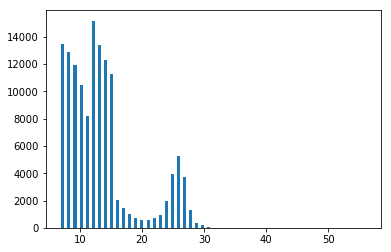

In [10]:
plt.hist(df['length'], bins = 100)
plt.show()

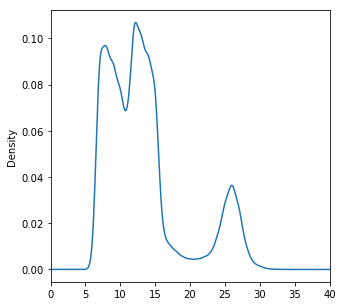

In [11]:
df['length'].plot(kind="density",
              figsize=(5,5), xlim=(0,40))

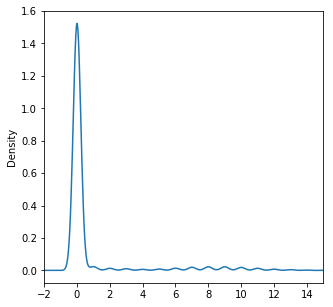

In [12]:
df['numbers'].plot(kind='density', figsize=(5,5), xlim=(-2,15))

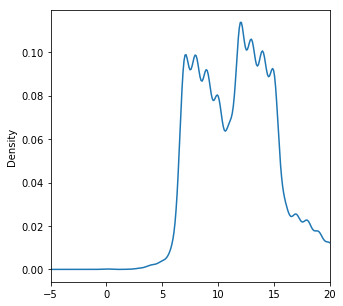

In [13]:
df['alpha'].plot(kind="density",
              figsize=(5,5), xlim = (-5,20))

## Encode Target Variable

In [14]:
def bad_class(string):
    if string == 'goz':
        return 1
    elif string =='newgoz':
        return 2
    elif string =='cryptolocker':
        return 3
    else:
        return 0

In [15]:
df['multiclass']=df['subclass'].apply(bad_class)

In [41]:
df.groupby(['subclass']).count()['host']

subclass
cryptolocker    34319
goz              7347
legit           81261
newgoz          10999
Name: host, dtype: int64

In [19]:
dg_dummies = pd.get_dummies(df['subclass'])
dg_dummies.head()

,cryptolocker,goz,legit,newgoz
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [20]:
df = pd.concat([df,dg_dummies], axis = 1)

In [24]:
final_inputs = ['numbers',
 'gibberish_avg',
 'words_avg',
 'entropy',
 'other_chars',
 'tld_length', 
 'vowel_count']

## Build Basic Model

In [25]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import metrics 

feature_set = df[final_inputs]
X= feature_set
y = df['multiclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)

/Users/matthew.berninger/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/matthew.berninger/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24041,    40,    17,   185],
       [    0,  1736,     0,   494],
       [    2,     0,  3303,     0],
       [  580,    62,     0,  9718]])

In [28]:
from sklearn.cross_validation import cross_val_score
scores_final = cross_val_score(lm, X, y, scoring='accuracy')
print('CV Acc {}, Average Acc {}'.format(scores_final, scores_final.mean()))

CV Acc [ 0.96534731  0.96279289  0.96429291], Average Acc 0.964144370366


In [29]:
kf = cross_validation.KFold(len(X_train), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'penalty': ['l2'],'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=kf,
    scoring='accuracy'
)

gs.fit(X_train, y_train)

lm_final = gs.best_estimator_
scores_final = cross_val_score(lm_final, X, y, scoring='accuracy')
print lm_final
print('CV Acc {}, Average Acc {}'.format(scores_final, scores_final.mean()))


LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
CV Acc [ 0.97045449  0.9686618   0.96763065], Average Acc 0.968915648762


In [30]:
from sklearn.metrics import confusion_matrix
y_pred = gs.best_estimator_.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print confusion_matrix

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print score

[[23916    79     5   283]
 [    0  1977     0   253]
 [    1     0  3304     0]
 [  323   264     0  9773]]
0.969933794614


In [38]:
from sklearn.ensemble import ExtraTreesClassifier

feature_set = df[final_inputs]
X= feature_set
y = df['multiclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)

dt_multi = ExtraTreesClassifier()

dt_multi.fit(X_train, y_train)

y_pred = dt_multi.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print cm
score = accuracy_score(y_test, y_pred)
print score

[[24120     2     1   160]
 [    4  2120     0   106]
 [    2     0  3303     0]
 [  173    56     0 10131]]
0.987455821594
